In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
143,146,6.7,3.0,5.2,2.3,Iris-virginica
144,147,6.3,2.5,5.0,1.9,Iris-virginica
145,148,6.5,3.0,5.2,2.0,Iris-virginica
146,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# sns.pairplot(data = data, hue = "Species")
# plt.show()

# UNDERSTANDING KNN ON A PSEUDO DATASET

In [4]:
x = [26,11, 15, 15, 30, 30, 20, 7, 10,21, 30, 15, 3, 5, 20, 7]
y = [26,11, 30, 5, 3, 16, 20, 7, 20,11, 30, 15, 3, 30, 20, 7]
names = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l", "m", "n", "o", "p"]

p = [26, 15]
q = [26, 20]

# REFERENCE POINTS M & N
m = [25]
n = [25]

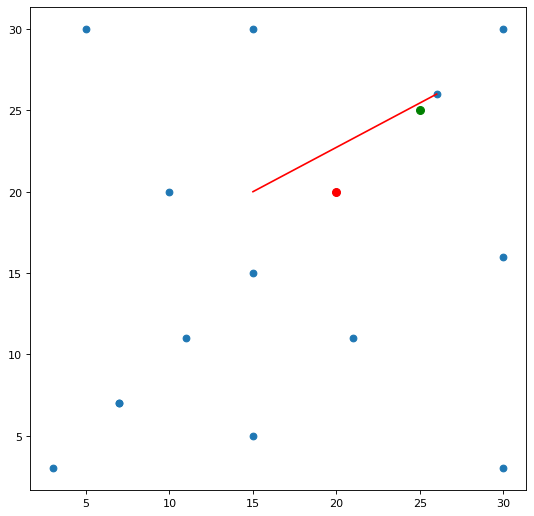

In [5]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(x, y)
plt.plot(p, q, color = "red")
plt.scatter(m, n, color = "green", s = 50)
plt.scatter(20, 20, color = "red", s = 50)

In [6]:
p = [15, 30]
q = [20, 30]

# C2 = A2 + B2

# a = q[1] - q[0]
# b = p[1] - p[0]

# print(a, b)
# p_q_dist = (a**2 + b**2) ** 0.5
# print(p_q_dist)

In [7]:
result_list = []

for point in zip(x,y, names):
    pseudo_m = m.copy()
    pseudo_n = n.copy()
    
    pseudo_m.append(point[0])
    pseudo_n.append(point[1])
    
#     print(pseudo_m, pseudo_n)

    a = abs(pseudo_m[1] - pseudo_m[0])
    b = abs(pseudo_n[1] - pseudo_n[0])

    p_q_dist = (a**2 + b**2) ** 0.5
    point = list(point)
    point.append(p_q_dist)
    result_list.append(point)
#     print( point, "--> ", p_q_dist)

print(result_list)

[[26, 26, 'a', 1.4142135623730951], [11, 11, 'b', 19.79898987322333], [15, 30, 'c', 11.180339887498949], [15, 5, 'd', 22.360679774997898], [30, 3, 'e', 22.561028345356956], [30, 16, 'f', 10.295630140987], [20, 20, 'g', 7.0710678118654755], [7, 7, 'h', 25.45584412271571], [10, 20, 'i', 15.811388300841896], [21, 11, 'j', 14.560219778561036], [30, 30, 'k', 7.0710678118654755], [15, 15, 'l', 14.142135623730951], [3, 3, 'm', 31.11269837220809], [5, 30, 'n', 20.615528128088304], [20, 20, 'o', 7.0710678118654755], [7, 7, 'p', 25.45584412271571]]


In [8]:
result_list.sort(key = lambda x: x[3])

In [9]:
closest_distance = result_list[0][2]

In [10]:
closest_distance

'a'

In [11]:
def sort_key(x):
    return x[3]
    
result_list.sort(key = sort_key)

# KNN FROM SCRATCH ON IRIS DATA SET

In [12]:
select_columns = data[["PetalLengthCm", "PetalWidthCm", "Species"]]
list_format_data = select_columns.values

In [13]:
# TEST POINTS M & N
m = [3]
n = [4]

In [61]:
def get_most_occuring(items, target_index):
#     print(items)
    values = dict()
    target_index = 2


    for item in items:
        
        if item[target_index] in values.keys():
            values[item[target_index]] += 1
        else:
            values[item[target_index]] = 1

    result_list = list(values.items())
    result_list.sort(key = lambda value: value[1], reverse = True)
    result = result_list[0]
#     print(result)
    return result

def knn_predictor(data, m = 0, n = 0, k = 5):
    result_list = []
    m = [m]
    n = [n]

    for point in data:
        pseudo_m = m.copy()
        pseudo_n = n.copy()

        pseudo_m.append(point[0])
        pseudo_n.append(point[1])

    #     print(pseudo_m, pseudo_n)

        a = abs(pseudo_m[1] - pseudo_m[0])
        b = abs(pseudo_n[1] - pseudo_n[0])

        p_q_dist = (a**2 + b**2) ** 0.5
        point = list(point)
        point.append(p_q_dist)
        result_list.append(point)
    #     print( point, "--> ", p_q_dist)

    # print(result_list)
    
    result_list.sort(key = lambda x: x[3])
    closest_distance = result_list[0:k]

    return get_most_occuring(closest_distance, 2)
    
prediction = knn_predictor(list_format_data, m = 10, n = 2)
print(prediction)

('Iris-virginica', 5)


SepalLengthCm SepalWidthCm
SepalLengthCm PetalLengthCm
SepalLengthCm PetalWidthCm
SepalWidthCm SepalLengthCm
SepalWidthCm PetalLengthCm
SepalWidthCm PetalWidthCm
PetalLengthCm SepalLengthCm
PetalLengthCm SepalWidthCm
PetalLengthCm PetalWidthCm
PetalWidthCm SepalLengthCm
PetalWidthCm SepalWidthCm
PetalWidthCm PetalLengthCm
[{'correct': 30, 'wrong': 0, 'accuracy': 100.0}, ['PetalLengthCm', 'PetalWidthCm']]
PetalLengthCm PetalWidthCm
PLOTTING


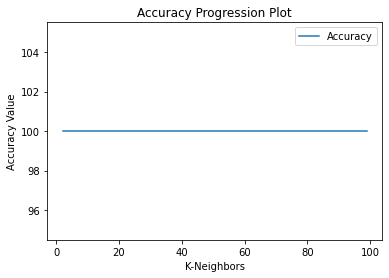

99

In [5]:
class KNN_BOY:
    
    def __init__(self, data, label = False, exemptions = []):
        
        if not label or not isinstance(label, str):
            raise ValueError("Dataset Label must be provided, and must be string.")
            
        self.label = label
        self.data = data
        self.k = int(data.shape[0] * 0.05) # 5 PERCENT OF DATASET LENGTH AS ORIGINAL K VALUE
        self.best_feature_combo = False
        self.exemptions = exemptions + [self.label]
        
    def get_most_occuring(self, items, target_index):
        values = dict()
        target_index = 2

        for item in items:

            if item[target_index] in values.keys():
                values[item[target_index]] += 1
            else:
                values[item[target_index]] = 1

        result_list = list(values.items())
        result_list.sort(key = lambda value: value[1], reverse = True)
        result = result_list[0]
        return result

    def knn_predictor(self, data, m = 0, n = 0, k = False):
        
        if k == False:
            k = self.k
        else:
            k = k
            
        result_list = []
        m = [m]
        n = [n]

        for point in data:
            pseudo_m = m.copy()
            pseudo_n = n.copy()

            pseudo_m.append(point[0])
            pseudo_n.append(point[1])

            a = abs(pseudo_m[1] - pseudo_m[0])
            b = abs(pseudo_n[1] - pseudo_n[0])

            p_q_dist = (a**2 + b**2) ** 0.5
            point = list(point)
            point.append(p_q_dist)
            result_list.append(point)

        result_list.sort(key = lambda x: x[3])
        closest_distance = result_list[0:k]

        return self.get_most_occuring(closest_distance, 2)
    
    def get_best_feature_combo(self):
        
        if self.best_feature_combo:
            return self.best_feature_combo
        
        feature_combo_accuracies = []

        for x_axis in self.data.columns:

            if x_axis in self.exemptions:
                continue

            for y_axis in data.columns:
                
                if x_axis == y_axis:
                    continue

                if y_axis in self.exemptions:
                    continue
                
                print(x_axis, y_axis)

                data_selection = self.data[[x_axis, y_axis, self.label]].values
                test_values = self.data.iloc[0:30][[x_axis, y_axis, self.label]].values
                test_values = list(test_values )


                predictions = []
                accuracy = {"correct":0, "wrong":0, "accuracy": 0}


                for datapoint in test_values:
                    prediction = self.knn_predictor(data = data_selection, m = datapoint[0], n = datapoint[1], k = self.k)
                    actual = datapoint[2]


                    if actual == prediction[0]:
                        accuracy["correct"] += 1
                    elif actual != prediction[0]:
                        accuracy["wrong"] += 1

                accuracy["accuracy"] = (accuracy["correct"]/len(test_values))*100
                feature_combo_accuracies.append([accuracy, [y_axis, x_axis]])
                
        feature_combo_accuracies.sort(key = lambda accuracy: accuracy[0]["accuracy"])
        best_feature_combo = feature_combo_accuracies[-1]

        self.best_feature_combo = best_feature_combo

        return self.best_feature_combo
    
    def plot_k_tuning(self, tuning_data):
            
        print("PLOTTING")

        predictions = np.array(tuning_data)
        plt.plot(predictions[:,0], predictions[:,1], label = "Accuracy")
        plt.xlabel("K-Neighbors")
        plt.ylabel("Accuracy Value")
        plt.title("Accuracy Progression Plot")
        plt.legend()
        plt.show()
    
    def optimize_k(self):
        
        predictions = []

        data_selection = self.data[[self.best_feature_combo[1][0], self.best_feature_combo[1][1], self.label]].values
        test_values = self.data.iloc[0:30][[self.best_feature_combo[1][0], self.best_feature_combo[1][0], self.label]].values
        test_values = list(test_values )
        print(self.best_feature_combo[1][0], self.best_feature_combo[1][1])

        for k in range(2, 100):
            accuracy = {"correct":0, "wrong":0, "accuracy": 0}

            for datapoint in test_values:
                prediction = self.knn_predictor(data = data_selection, m = datapoint[0], n = datapoint[1], k = self.k)
                actual = datapoint[2]

                if actual == prediction[0]:
                    accuracy["correct"] += 1
                elif actual != prediction[0]:
                    accuracy["wrong"] += 1

            accuracy["accuracy"] = (accuracy["correct"]/len(test_values))*100
            predictions.append([k, accuracy["accuracy"]])
#             print(accuracy)
            
        predictions.sort(key = lambda accuracy: accuracy[1])
        best_k_value = predictions[-1]
        self.k = best_k_value[0]
#         print(predictions)

        self.plot_k_tuning(predictions)

        return self.k


new_knn_predictor = KNN_BOY(data , label= "Species", exemptions = ["Id"])

print(new_knn_predictor.get_best_feature_combo())
new_knn_predictor.optimize_k()